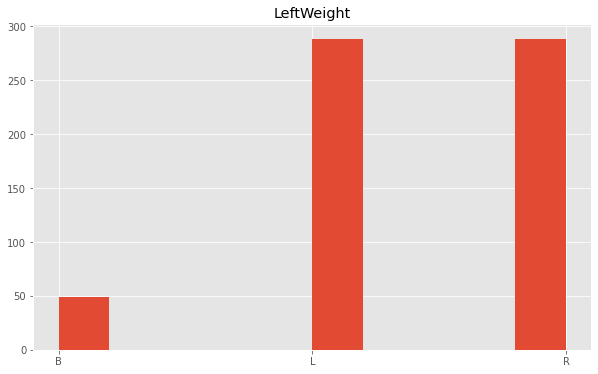

<Figure size 432x288 with 0 Axes>

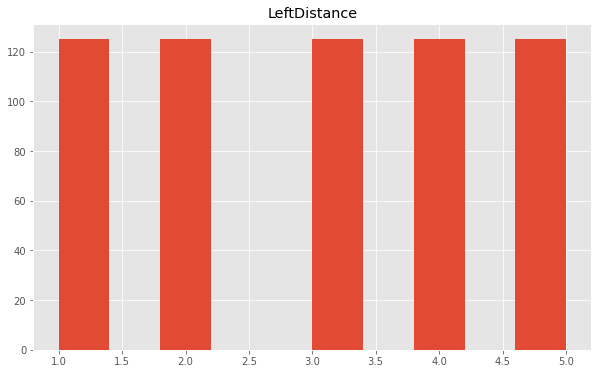

<Figure size 432x288 with 0 Axes>

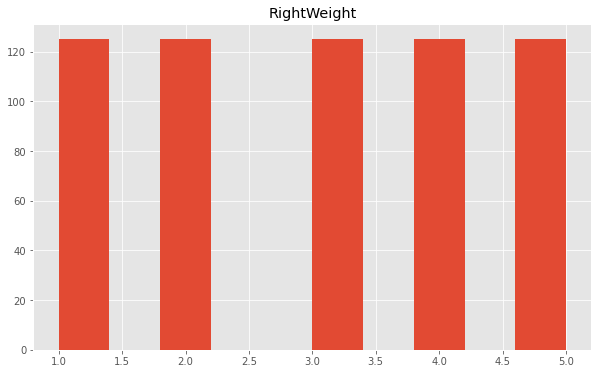

<Figure size 432x288 with 0 Axes>

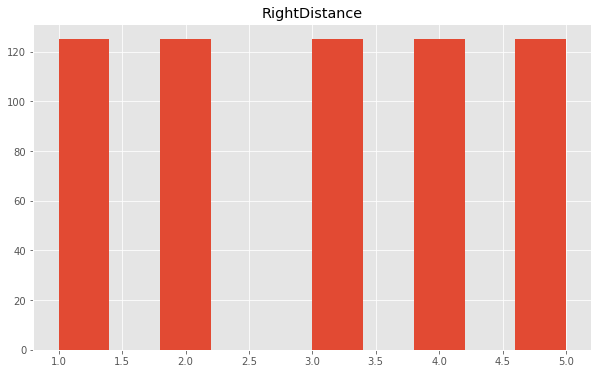

<Figure size 432x288 with 0 Axes>

In [4]:
#Load the necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('balance-scale.data',sep=',',header=None)
df.columns=['ClassName','LeftWeight','LeftDistance','RightWeight','RightDistance']
df.head(5)

l=['LeftWeight','LeftDistance','RightWeight','RightDistance']
for i in range(0,4):
    plt.figure(figsize=(10.0,6.0))
    plt.title(label=l[i])
    plt.hist(sorted(df.iloc[:,i]))
    plt.show()
    plt.clf()

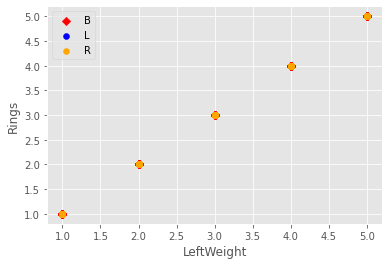

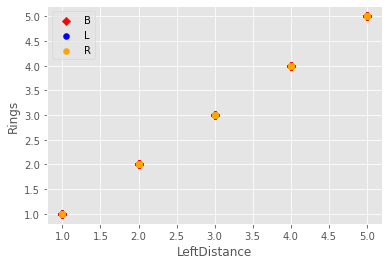

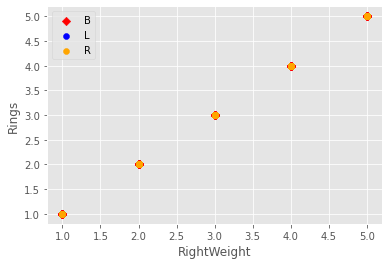

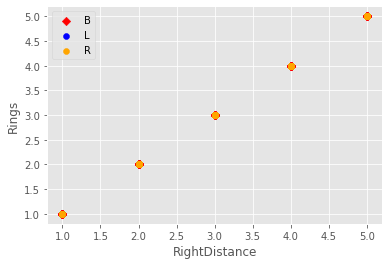

In [5]:
for i in range(0,4):
    plt.scatter(df[l[i]][df.ClassName=="B"].array,
                df[l[i]][df.ClassName=="B"].array,
               marker='D',
               color='red',
               label='B'
            )

    plt.scatter(df[l[i]][df.ClassName=="L"].array,
                df[l[i]][df.ClassName=="L"].array,
               marker='o',
               color='blue',
               label='L'
            )
    plt.scatter(df[l[i]][df.ClassName=="R"].array,
                df[l[i]][df.ClassName=="R"].array,
               marker='o',
               color='orange',
               label='R'
            )
    plt.xlabel(l[i])
    plt.ylabel('Rings')
    plt.legend()
    plt.show()

Through the characteristic scatter diagram, we can find that the size of rings has a linear relationship with each characteristic attribute, in which the length and diameter are obvious. When the length is less than 0.4 or the diameter is less than 0.3, there are almost no rings greater than 15.

In [6]:
for i in range(0,df['ClassName'].size):
    if df['ClassName'][i]=='B':
        df.loc[i,'ClassName']=0
    elif df['ClassName'][i]=='L':
        df.loc[i,'ClassName']=1
    else:
        df.loc[i,'ClassName']=2
for i in range(1,4):
    df.loc[i,l[i]]=int(df.loc[i,l[i]])

In [8]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

X = df.drop('ClassName',axis=1).values
y = df['ClassName'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

bys = GaussianNB()
bys.fit(X_train, y_train.astype('int'))
y_hat = bys.predict(X_test)
print(classification_report(y_test.astype('int'), y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.88      0.97      0.92       115
           2       0.92      0.97      0.95       115

    accuracy                           0.90       250
   macro avg       0.60      0.65      0.62       250
weighted avg       0.82      0.90      0.86       250



C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bin\anaconda3\envs\Mach_Learn\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
